In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("D:\\docs\\telecomcustomerchurn.csv")
df.sample(5)
#here customer id is useless

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4470,8242-JSVBO,Male,0,No,No,7,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.65,322.5,No
5230,5887-IKKYO,Male,0,Yes,Yes,58,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),94.35,5563.65,No
3725,0968-GSIKN,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.80,70.8,Yes
3064,7855-DIWPO,Female,0,No,No,21,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,68.65,1493.2,No
4978,4855-SNKMY,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.10,44.1,Yes


In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes
#here totalcharges is object but montly charges is float

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

## there are some spaces in between the values lets remove it

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
# let drop these rows

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [9]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [10]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [12]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\admin\AppData\Local\Temp\ipykernel_17592\695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [13]:
df1.dtypes
#datatype is changes here

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# tenure is how loyal a customer is

In [14]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [15]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

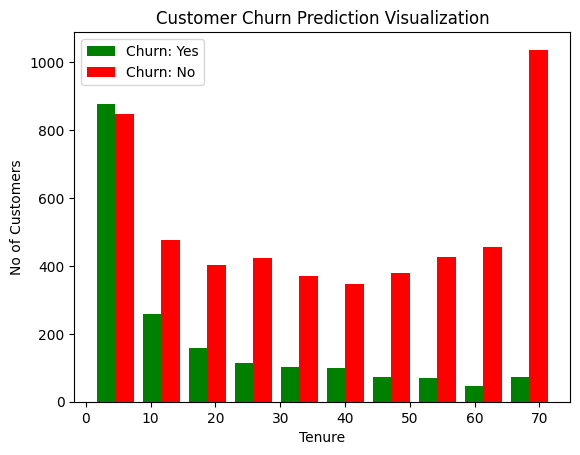

In [16]:
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn: Yes','Churn: No'])
plt.xlabel('Tenure')
plt.ylabel('No of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.legend()
plt.show()

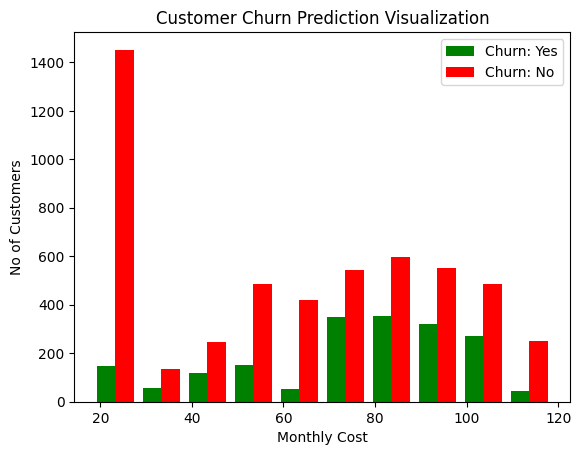

In [17]:
monthlycost_churn_no=df1[df1.Churn=='No'].MonthlyCharges
monthlycost_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.hist([monthlycost_churn_yes,monthlycost_churn_no],color=['green','red'],label=['Churn: Yes','Churn: No'])
plt.xlabel('Monthly Cost')
plt.ylabel('No of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.legend()
plt.show()

In [18]:
for column in df:
    print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [19]:
for column in df:
    print(column,": ",df[column].unique())

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :  [29.85 56.95 53

In [20]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(column,": ",df[column].unique())

In [21]:
print_unique_col_values(df1)

gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :  ['No' 'Yes']


In [22]:
df1.replace('No internet service','No',inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_17592\3939576099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [23]:
df1.replace('No phone service','No',inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_17592\628100714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [24]:
print_unique_col_values(df1)

gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes']
OnlineBackup :  ['Yes' 'No']
DeviceProtection :  ['No' 'Yes']
TechSupport :  ['No' 'Yes']
StreamingTV :  ['No' 'Yes']
StreamingMovies :  ['No' 'Yes']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :  ['No' 'Yes']


In [25]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_17592\1255182669.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1,'No':0},inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_17592\1255182669.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes':1,

In [26]:
for col in df1:
    print(col,": ",df1[col].unique())

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  [1 0]
Dependents :  [0 1]
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :  [0 1]
MultipleLines :  [0 1]
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  [0 1]
OnlineBackup :  [1 0]
DeviceProtection :  [0 1]
TechSupport :  [0 1]
StreamingTV :  [0 1]
StreamingMovies :  [0 1]
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  [1 0]
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :  [0 1]


In [27]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_17592\698335744.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_17592\698335744.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].repl

In [28]:
for col in df1:
    print(col,": ",df1[col].unique())

gender :  [1 0]
SeniorCitizen :  [0 1]
Partner :  [1 0]
Dependents :  [0 1]
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :  [0 1]
MultipleLines :  [0 1]
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  [0 1]
OnlineBackup :  [1 0]
DeviceProtection :  [0 1]
TechSupport :  [0 1]
StreamingTV :  [0 1]
StreamingMovies :  [0 1]
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  [1 0]
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :  [0 1]


## Now we will do one hot encoding for the columns internetservice, contract, paymentmethod etc

In [29]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'],dtype=int)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [30]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [31]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [32]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [33]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4623,0,1,1,0,0.957746,1,1,0,1,1,...,0,1,0,1,0,0,1,0,0,0
2980,1,0,0,0,1.000000,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2867,1,0,0,0,0.323944,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2966,1,1,0,0,0.183099,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2068,0,0,0,0,0.647887,1,1,1,1,0,...,0,1,0,1,0,0,0,0,0,1


In [34]:
for col in df2:
    print(col,": ",df2[col].unique())

gender :  [1 0]
SeniorCitizen :  [0 1]
Partner :  [1 0]
Dependents :  [0 1]
tenure :  [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService :  [0 1]
MultipleLines :  [0 1]
OnlineSecurity :  [0 1]
OnlineBackup :  [1 0]
DeviceProtection :  

In [35]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [37]:
x_train.shape

(5625, 26)

In [38]:
x_test.shape

(1407, 26)

In [39]:
len(x_train.columns)

26

In [40]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100)

Epoch 1/100


C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - accuracy: 0.7339 - loss: 0.5356
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.7970 - loss: 0.4310
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.7909 - loss: 0.4229
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.8106 - loss: 0.4183
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.8099 - loss: 0.4091
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.8000 - loss: 0.4205
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.8070 - loss: 0.4118
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8063 - loss: 0.4136
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.8106 - loss: 0.4049
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.8029 - loss: 0.4120
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.8053 - loss: 0.4115
Epoch 12/100
176/176 ━━━━━━━━━━━━

In [41]:
model.evaluate(x_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.7886 - loss: 0.4486


[0.46417662501335144, 0.7761194109916687]

In [42]:
yp=model.predict(x_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.21456003],
       [0.53348875],
       [0.01222272],
       [0.77699953],
       [0.55470014]], dtype=float32)

In [43]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [44]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [45]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0]

In [46]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       999
           1       0.63      0.54      0.58       408

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

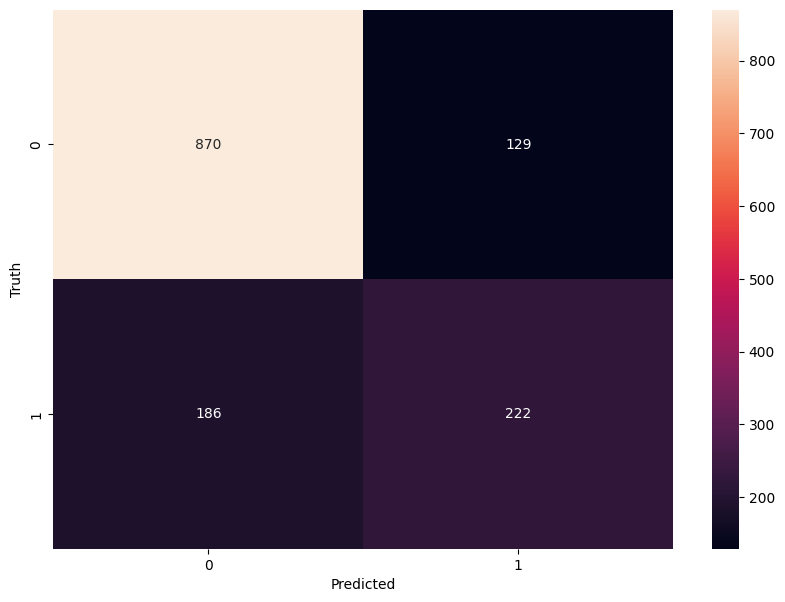

In [47]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
def ANN(x_train,y_train,x_test,y_test,loss,weights):
    model=keras.Sequential([
        keras.layers.Dense(26,input_dim=26,activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])

    if weights==-1:
        model.fit(x_train,y_train,epochs=100)
    else:
        model.fit(x_train,y_train,epochs=100,class_weight=weights)
    print(model.evaluate(x_test,y_test))
    y_preds=model.predict(x_test)
    y_preds=np.round(y_preds)
    print("Classification Report: \n",classification_report(y_test,y_preds))
    return y_preds

In [53]:
y_preds=ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.6344 - loss: 0.6013
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.7898 - loss: 0.4390
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.7985 - loss: 0.4139
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.7953 - loss: 0.4224
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.8052 - loss: 0.4180
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.8128 - loss: 0.4102
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.8190 - loss: 0.3979
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.8099 - loss: 0.4087
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.8115 - loss: 0.3988
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.8104 - loss: 0.4103
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.8152 - loss: 0.3976
Epoch 12/100
176/176 ━━━━━━━━━━

# Method 1: Undersampling

In [54]:
count_class_0,count_class_1=df1.Churn.value_counts()

df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [62]:
df_class_0['Churn'],df_class_1['Churn']

(0       0
 1       0
 3       0
 6       0
 7       0
        ..
 7037    0
 7038    0
 7039    0
 7040    0
 7042    0
 Name: Churn, Length: 5163, dtype: int64,
 2       1
 4       1
 5       1
 8       1
 13      1
        ..
 7021    1
 7026    1
 7032    1
 7034    1
 7041    1
 Name: Churn, Length: 1869, dtype: int64)

In [55]:
df_class_0.shape

(5163, 27)

In [56]:
df_class_1.shape

(1869, 27)

In [68]:
df_class_0_under=df_class_0.sample(count_class_1)
df_test_under=pd.concat([df_class_0_under,df_class_1],axis='rows')
df_test_under.shape

(3738, 27)

In [69]:
print("Random under-sampling: ")
print(df_test_under.Churn.value_counts())

Random under-sampling: 
Churn
0    1869
1    1869
Name: count, dtype: int64


In [70]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [71]:
x=df_test_under.drop('Churn',axis='columns')
y=df_test_under['Churn']

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [74]:
y_train.value_counts() #it is equal because of strartify=y

Churn
0    1495
1    1495
Name: count, dtype: int64

In [75]:
y_preds=ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5963 - loss: 0.6593
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7706 - loss: 0.5104
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7707 - loss: 0.4960
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7743 - loss: 0.4840
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7795 - loss: 0.4635
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7719 - loss: 0.4721
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.4605
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7869 - loss: 0.4605
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7904 - loss: 0.4528
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7794 - loss: 0.4715
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7773 - loss: 0.4676
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

### f1 score is improved in the above cell

# Method 2: Oversampling

In [77]:
count_class_0,count_class_1

(5163, 1869)

## here only 1869 is available in count class 1 but we need 5163 for this we can simple use .sample with replace=True. This will add duplicate values randomly

In [80]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_test_over=pd.concat([df_class_0,df_class_1_over],axis='rows')

In [81]:
df_test_over.shape

(10326, 27)

In [82]:
print("Random over-sampling")
print(df_test_over.Churn.value_counts())

Random over-sampling
Churn
0    5163
1    5163
Name: count, dtype: int64


In [83]:
x=df_test_over.drop('Churn',axis='columns')
y=df_test_over['Churn']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [84]:
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [85]:
y_preds=ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6637 - loss: 0.6029
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7490 - loss: 0.5089
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7699 - loss: 0.4815
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7721 - loss: 0.4729
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7642 - loss: 0.4766
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7707 - loss: 0.4639
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7642 - loss: 0.4781
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7763 - loss: 0.4632
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7863 - loss: 0.4558
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7891 - loss: 0.4518
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7756 - loss: 0.4639
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

### f1 score is incresed

# Method 3: SMOTE
## Here unlike over sampling we won't duplicate the available samples again and again. Here it will create new samples using k nearest neighbour algorithm for this

In [86]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [88]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [92]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)

In [93]:
y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [95]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [96]:
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [97]:
y_preds=ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7116 - loss: 0.5798
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7726 - loss: 0.4770
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7776 - loss: 0.4733
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7946 - loss: 0.4443
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7886 - loss: 0.4474
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7854 - loss: 0.4494
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7883 - loss: 0.4462
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7970 - loss: 0.4360
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7971 - loss: 0.4351
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8115 - loss: 0.4152
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8007 - loss: 0.4235
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

# Method 4: Use of Ensemble with undersampling

In [98]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [99]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [101]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [103]:
4130/1495 #we will divide it into three batches

2.762541806020067

In [104]:
4130/3

1376.6666666666667

In [107]:
df3=x_train.copy()
df3['Churn']=y_train 

In [110]:
df3_class0=df3[df3['Churn']==0]
df3_class1=df3[df3['Churn']==1]

In [111]:
df3_class0.shape,df3_class1.shape

((4130, 27), (1495, 27))

In [112]:
df3_class0[:1495].shape

(1495, 27)

In [120]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
    x_train=df_train.drop('Churn',axis='columns')
    y_train=df_train.Churn
    return x_train,y_train

In [128]:
x_train,y_train=get_train_batch(df3_class0,df3_class1,0,1495)
y_pred1=ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - accuracy: 0.5884 - loss: 0.6700
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.7522 - loss: 0.5319
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.7873 - loss: 0.4735
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.7738 - loss: 0.4838
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.7422 - loss: 0.5137
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.7761 - loss: 0.4659
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.7860 - loss: 0.4600
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.7812 - loss: 0.4768
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7903 - loss: 0.4709
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.7936 - loss: 0.4543
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.7770 - loss: 0.4792
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step -

In [129]:
x_train,y_train=get_train_batch(df3_class0,df3_class1,1495,2990)
y_pred2=ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 0.6316 - loss: 0.6421
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.7470 - loss: 0.5223
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.7534 - loss: 0.5066
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.7471 - loss: 0.5004
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.7566 - loss: 0.4882
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.7603 - loss: 0.4854
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.7677 - loss: 0.4777
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.7703 - loss: 0.4720
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.7693 - loss: 0.4668
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.7663 - loss: 0.4664
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.7643 - loss: 0.4680
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step

In [130]:
x_train,y_train=get_train_batch(df3_class0,df3_class1,2990,4130)
y_pred3=ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - accuracy: 0.7007 - loss: 0.6149
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.7669 - loss: 0.4905
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.7748 - loss: 0.4864
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.7663 - loss: 0.4893
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.7667 - loss: 0.4866
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.7942 - loss: 0.4702
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.7779 - loss: 0.4824
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.7849 - loss: 0.4733
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.7784 - loss: 0.4728
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.7833 - loss: 0.4529
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.7861 - loss: 0.4651
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step

In [131]:
y_pred_final=y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

In [132]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1033
           1       0.48      0.81      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407

